# **FOOD RECOMMENDATION BASED ON CONTENT FILTERING ALGORITHM**

### **Data Preprocessing**

In [13]:
from google.colab import drive
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Dataste/Food/1662574418893344.csv')
data.shape

(400, 5)

In [10]:
data.head(5)


,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [9]:
# data structure information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB
None


In [6]:
data.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


In [12]:
# null values
jumlah_null = data.isnull().sum()

print(jumlah_null)

Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64


In [11]:
def text_cleaning(text):
    text  = "".join([char for char in text if char not in string.punctuation])    
    return text

**Visualization of the most common words in food descriptions (Describe)**

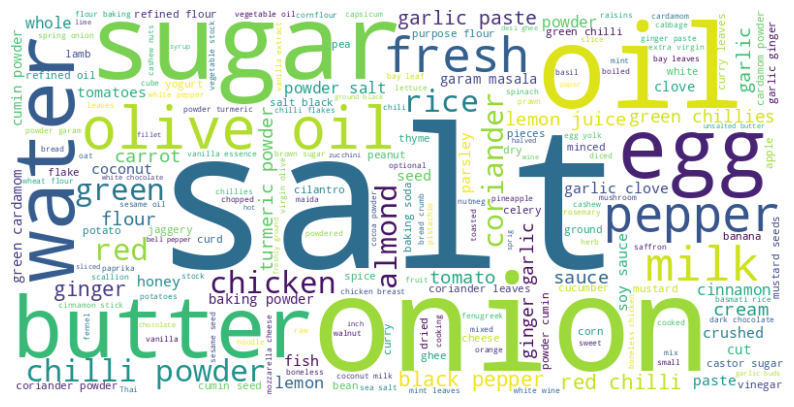

In [14]:
# Combines all food descriptions into one text
all_text = ' '.join(data['Describe'].values.astype(str))

# creat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

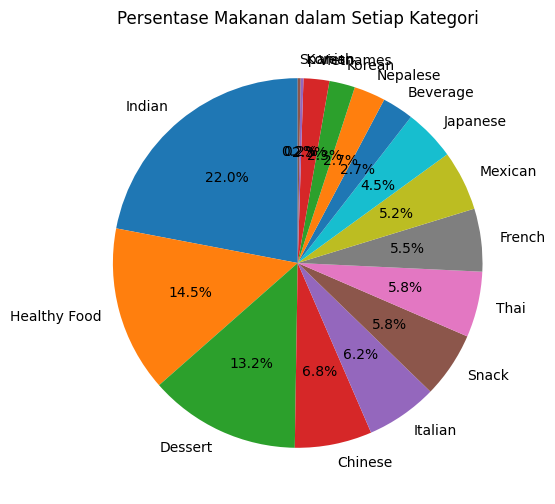

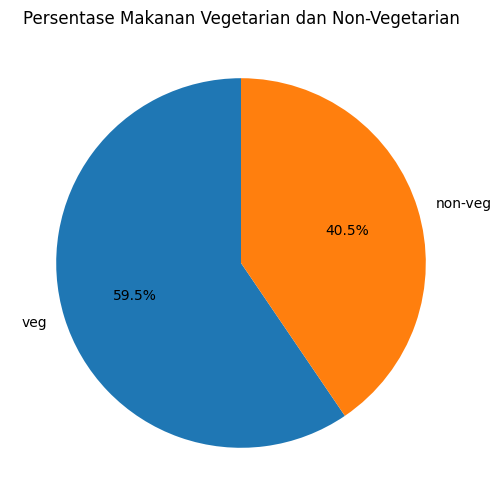

In [15]:
# count the number of foods in each category(C_Type)
category_counts = data['C_Type'].value_counts()
veg_non_counts = data['Veg_Non'].value_counts()

# Create plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Makanan dalam Setiap Kategori')
plt.show()

# Create plot Pie Chart veg & non-veg
plt.figure(figsize=(6, 6))
plt.pie(veg_non_counts, labels=veg_non_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Makanan Vegetarian dan Non-Vegetarian')
plt.show()

### **Content based filtering**

**TF-IDF matrix from the text contained in the 'Describe' column**

In [16]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(data['Describe'])

print("Bentuk matriks TF-IDF:", tfidf_matrix.shape)                              

Bentuk matriks TF-IDF: (400, 1166)


In [18]:
# calculates the cosine similarity between each pair of texts in the TF-IDF matrix

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

print("Bentuk matriks cosine sim:", cosine_sim.shape)    

Bentuk matriks cosine sim: (400, 400)


In [22]:
cosine_sim

array([[1.        , 0.1623187 , 0.12997236, ..., 0.12669135, 0.12381163,
        0.09773775],
       [0.1623187 , 1.        , 0.06775767, ..., 0.14711416, 0.05786264,
        0.16466691],
       [0.12997236, 0.06775767, 1.        , ..., 0.03242423, 0.12197946,
        0.01763026],
       ...,
       [0.12669135, 0.14711416, 0.03242423, ..., 1.        , 0.        ,
        0.09761451],
       [0.12381163, 0.05786264, 0.12197946, ..., 0.        , 1.        ,
        0.        ],
       [0.09773775, 0.16466691, 0.01763026, ..., 0.09761451, 0.        ,
        1.        ]])

In [31]:
def create_soup(x):
    return x['C_Type'] + " " + x['Veg_Non'] + " " + x['Describe']

data['soup'] = data.apply(create_soup, axis=1)

# CountVectorizer
count = CountVectorizer(stop_words='english')

#frequency of occurrence of words in 'soup'
count_matrix = count.fit_transform(data['soup'])


In [36]:
words_indices = sorted(count.vocabulary_.items(), key=lambda x: x[1])

In [26]:
Labels = pd.Series(data.index, index = data['Name']).drop_duplicates()


In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


labels_df = pd.DataFrame({'Name': Labels.index, 'Index': Labels.values})
print("Labels data:")
print(labels_df.to_string(index=False))

Labels data:
                                                                       Name  Index
                                                        summer squash salad      0
                                                       chicken minced salad      1
                                                       sweet chilli almonds      2
                                                            tricolour salad      3
                                                             christmas cake      4
                                  japanese curry arancini with barley salsa      5
                                                     chocolate nero cookies      6
                                      lamb and chargrilled bell pepper soup      7
                                                       cream of almond soup      8
                                                   broccoli and almond soup      9
                                                  coconut lime quinoa sala

In [39]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix).astype(np.float32)


In [40]:
if 'level_0' in data.columns:
    df = data.drop('level_0', axis=1)

df = data.reset_index()
indices = pd.Series(data.index, index=df['Name'])

In [45]:
from tabulate import tabulate

def get_recommendations(title, cosine_sim=cosine_sim2):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    food_indices = [i[0] for i in sim_scores]
    
    recommendations = df.loc[food_indices, 'Name'].reset_index(drop=True)
    recommendations.index += 1
    
    return recommendations




In [46]:
title = 'sweet potato pie'
recommendations = get_recommendations(title, cosine_sim2)

data = {'Rank': range(1, len(recommendations)+1),
        'Food Name': recommendations}

df_recommendations = pd.DataFrame(data)

print(f"Top 5 recommendations for '{title}':")
print(tabulate(df_recommendations, headers='keys', showindex=False, tablefmt='psql'))


Top 5 recommendations for 'sweet potato pie':
+--------+-----------------------------------+
|   Rank | Food Name                         |
|--------+-----------------------------------|
|      1 | chocolate doughnut                |
|      2 | pista chocolate & mandarin        |
|      3 | camel milk cake tart              |
|      4 | Lemon-Ginger Cake with Pistachios |
|      5 | apple kheer                       |
+--------+-----------------------------------+


### **Convert pickle**

In [48]:
import pickle
model = {
    'tfidf': tfidf,
    'cosine_sim': cosine_sim,
    'Labels': Labels
}

# Menyimpan model ke dalam file pickle
with open('model_content_based.pkl', 'wb') as f:
    pickle.dump(model, f)